<h1 style="font-family: Georgia; font-size:3em;color:#2462C0; font-style:bold">
K-means Clustering
</h1><br>

1. Introduction
- Kmeans Clustering
- Implementation
- Application
    - Image segmentation
    - profile segmentation
- Evaluation
- Drawbacks
- Conclusion

<h2 style="font-family: Georgia; font-size:2em;color:purple; font-style:bold">
Introduction
</h2><br>

<h2 style="font-family: Georgia; font-size:2em;color:purple; font-style:bold">
K-means Clustering
</h2><br>
K-means algorithm tries to partition dataset into $K$ distinct non-overlapping groups (clusters) where each example belongs to **only one group**. The way K-means algorithm works is as follows:
1. Specify number of clusters $K$.
2. Initialize centroids by first shuffle the dataset and then randomly selecting $K$ examples for the centroids without replacement.
3. Compute the squared euclidean distance between examples and all centroids.
4. Assign each example to the closest cluster (centroid).
5. Compute the centroids for the clusters by taking the average of the examples that belong to each cluster.
$$\frac{1}{C_k}\sum_{i \in C_k}x^i$$
where ${C_k}$ is the set of examples that are assigned to centroid $k$.
6. Recompute the distance between examples and all centroids and reassign each example to the closest cluster.
7. Keep iterating until there is no change to the centroids. i.e assignment of examples isn't changing.

The objective function is:
$$\frac{1}{m}\sum_{i = 1}^{m}\|x^i - \mu_{c^i}\|^2\\{}$$
where $\mu_{c^i}$ is the mean of the cluster the example $x^i$ belongs to.

Within-cluster variation is:
$$\frac{1}{m_k}\sum_{i = 1}^{m_k}\|x^i - \mu_{c^k}\|^2$$
The less variation we have within clusters, the more homogeneous (similar) the examples are within the same cluster. Note that different random initialization may lead to different clusters since K-means algorithm may *stuck in a local optimum and may not converge to global optimum*. Threfore, it's recommended that we iterate between 50-1000 over the algorithm and get the clusters that yield the lowest error. Moreover, there is no right answer in terms of the number of clusters that we should have in any problem. Since mostly we use clustering algorithms for some later/downstream purposes, we can evaluate how well the models are performing based on different $k$ clusters.

<h2 style="font-family: Georgia; font-size:2em;color:purple; font-style:bold">
Implementation
</h2><br>

In [111]:
# Modules
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import pandas as pd
from scipy.io import loadmat
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')

In [94]:
# Initialize centroids by assigning them to K training examples
def initialize_centroids(X, K):
    '''
    X: feature matrix m x n
    K: number of clusters
    Return: centroids vector K x n
    '''
    m = X.shape[0] # number of trainig examples
    # shuffle the index of the features without replacement
    random_index = np.random.permutation(m)
    
    return X[random_index[:K], :]


# Calculate the squared distance between examples & all centroids and assign each
# example to the closest centroid
def find_closest_centroids(X, centroids):
    '''
    X: feature matrix m x n
    centroids: clusters' means k x n
    Return: index of examples' clusters m x 1
    '''
    m = X.shape[0]
    K = centroids.shape[0]
    # initialize distance matrix
    distance = np.zeros((m, K))
    
    for i in range(K):
        distance[:, i] = np.sum(np.square(X - centroids[i, :]), axis=1)
    idx = np.argmin(distance, axis=1)

    return idx


# Calculate mean of each cluster (centroids)
def compute_centroids(X, idx, K):
    '''
    X: feature matrix m x n
    idx: index of examples' clusters
    K: number of clusters
    Return: centroids vector K x n
    '''
    n = X.shape[1]
    centroids = np.zeros((K, n))
    
    for i in range(K):
        centroids[i, :] = np.mean(X[idx == i, :], axis=0)

    return centroids


# Define kmean algorithm
def kMeans(X, K, maxiter=10):
    '''
    X: feature matrix m x n
    K: number of clusters    
    maxiter: number of iterations the algorithm will go through 
    Return: centroids vector K x n and index vector m x 1
    '''
    # Initializes centroids vector
    centroids = initialize_centroids(X, K)

    for i in range(maxiter):
        # assign examples to clusters
        idx = find_closest_centroids(X, centroids)
        # compute the mean of each cluster
        centroids = compute_centroids(X, idx, K)
        
    # rerun idx to get the latest assignment using final centroids vector
    idx = find_closest_centroids(X, centroids)
    
    return centroids, idx

<h2 style="font-family: Georgia; font-size:2em;color:purple; font-style:bold">
Application
</h2><br>

<h2 style="font-family: Georgia; font-size:1.5em;color:purple; font-style:bold">
K-means on 2D Dataset
</h2><br>
We'll first implement the K-means algorithm on 2D dataset and see how it works. The dataset has 300 examples and 2 features and we will try to find $k$ subgroups within those examples and group them accordingly. Therefore, we'll end with subgroups where each subgroup has examples that are more homogenous (similar) to each other than the rest of the examples.



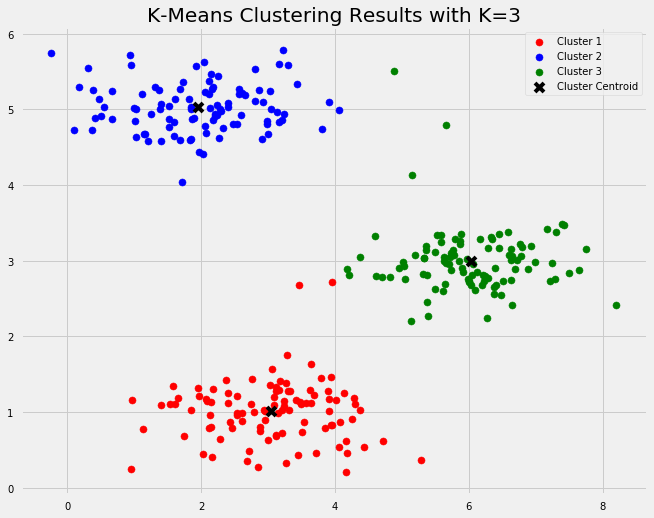

In [3]:
# Load the data
data = loadmat("../data/ex7data2.mat")
X = data["X"]

# Set the number of clusters and iterations the Kmeans algorithm will go through
K = 3; maxiter = 10

# Run the Kmeans algorithm and get the index of clusters for which each example
# belongs to as well as the final centroids vector
centroids, idx = kMeans(X, K, maxiter)

# Plot the data colored by the clusters each example belongs to
fig, ax = plt.subplots(figsize = (10, 8))
plt.scatter(X[idx == 0, 0], X[idx == 0, 1], s=50, c="red", label="Cluster 1")
plt.scatter(X[idx == 1, 0], X[idx == 1, 1], s=50, c="blue", label="Cluster 2")
plt.scatter(X[idx == 2, 0], X[idx == 2, 1], s=50, c="green", label="Cluster 3")
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=80, c="k", label="Cluster Centroid")
plt.legend()
plt.title("K-Means Clustering Results with K=3");

The above graph shows the scatter plot of the examples colored by the cluster they belong to. In this example, we chose $K = 3$ and it seems it's not bad. The symbol **'x'** is the centroid of each cluster. One of the most common applications of K-means clustering is *Market Segmentation*. We can think of those 3 clusters as different kinds of customers that behave similarly or have similar purchasing patterns. Therefore, we can target those customers using different types of promotions or ads.

<h2 style="font-family: Georgia; font-size:1.5em;color:purple; font-style:bold">
Image Compression with K-means
</h2><br>
In this exercise, we'll implement K-means to image compression. The image that we'll be working on is 128 x 128 x 3. Therefore, for each pixel location we would have 3 8-bit integers that specify the red, green, and blue intensity values. Our goal is to reduce the number of colors to 16 and represent (compress) the photo using those 16 colors only. To pick which colors to use, we'll use K-means algorithm on the image and treat every pixel as an example. That means we would have 128 x 128 = 16,384 examples. Doing so will allow us to represent the image using the 16 centroids for each pixel and would significantly reduce the size of the image by a factor of 6. The original image size was 128 x 128 x 24 = 393,216 bits; however, the new compressed image would be 16 x 24 + 128 x 128 x 4 = 65,920 bits. The huge difference comes from the fact that we'll be using centroids as a lookup for pixels' colors and that would reduce the size of each pixel location to 4-bit instead of 8-bit.

In [106]:
# Read the image
A = imread("images/Loans-borrow-repay.jpg")

# Get the shape of the image
img_size = A.shape

# Reshape it to be 2-dimension
X = A.reshape(img_size[0] * img_size[1], img_size[2])

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


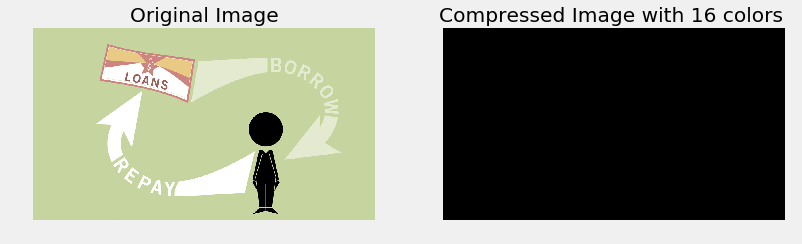

In [107]:
# Set the number of clusters and iterations the Kmeans algorithm will go through
K = 100; maxiter = 10

# Run the Kmeans algorithm and get the index of clusters for which each example
# belongs to as well as the final centroids vector
centroids, idx = kMeans(X, K, maxiter)

# Use the centroids colors as lookup for all examples
X_recovered = centroids[idx, :]

# Reshape X_recovered to have the same dimension as the original image 128 * 128 * 3
X_recovered = X_recovered.reshape(img_size[0], img_size[1], img_size[2])
# X_recovered = X_recovered.astype('uint8')

# Plot the original and the compressed image next to each other
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(A)
ax[0].set_title("Original Image")
ax[1].imshow(X_recovered)
ax[1].set_title("Compressed Image with 16 colors ")
for ax in fig.axes:
    ax.axis("off");

We can see the comparison between the original image and the compressed one. The compressed image looks very similar and close to the original one which means we're able to retain most of the characteristics of the original image.

In [ ]:
# Get the shape of the image
img_size = A.shape

# Reshape it to be 2-dimension
X = A.reshape(img_size[0] * img_size[1], img_size[2])

<h2 style="font-family: Georgia; font-size:2em;color:purple; font-style:bold">
Evaluation
</h2><br>

<h2 style="font-family: Georgia; font-size:2em;color:purple; font-style:bold">
Drawbacks
</h2><br>

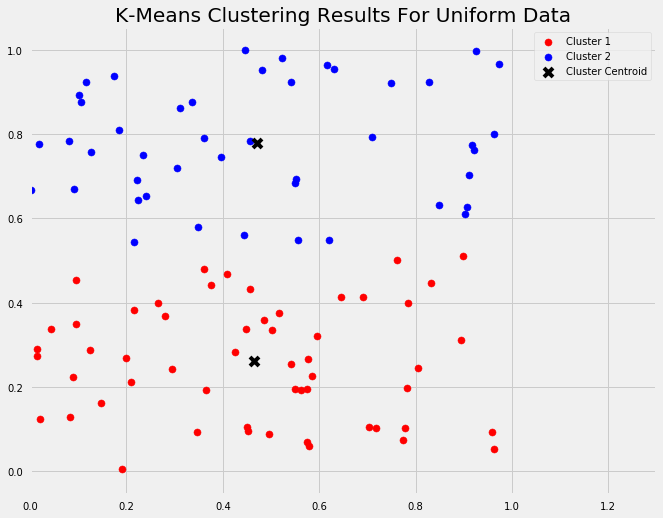

In [10]:
# Uniform
x1 = np.random.uniform(size=(100, 2))
k = 2
centroids, idx = kMeans(x1, k)
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(x1[idx == 0, 0], x1[idx == 0, 1], s=50, c="red", label="Cluster 1")
plt.scatter(x1[idx == 1, 0], x1[idx == 1, 1], s=50, c="blue", label="Cluster 2")
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=80, c="k", label="Cluster Centroid")
plt.xlim([0, 1.3])
plt.legend(loc="upper right")
plt.title("K-Means Clustering Results For Uniform Data");

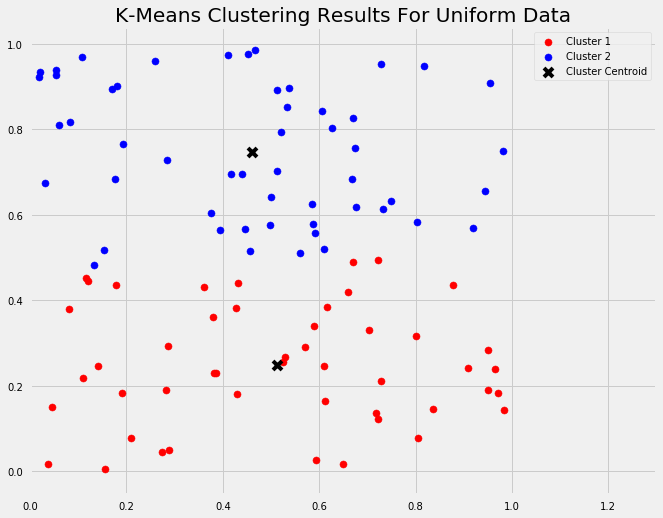

In [117]:
# Uniform
x1 = np.random.uniform(size=(100, 2))
k = 2
km = KMeans(n_clusters=2)
km.fit(x1)
labels = km.predict(x1)
centroids = km.cluster_centers_
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(x1[labels == 0, 0], x1[labels == 0, 1], s=50, c="red", label="Cluster 1")
plt.scatter(x1[labels == 1, 0], x1[labels == 1, 1], s=50, c="blue", label="Cluster 2")
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=80, c="k", label="Cluster Centroid")
plt.xlim([0, 1.3])
plt.legend(loc="upper right")
plt.title("K-Means Clustering Results For Uniform Data");

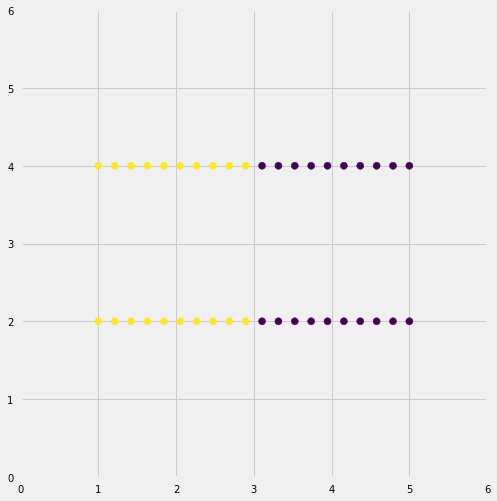

In [118]:
# Create horizantal data
X = np.tile(np.linspace(1, 5, 20), 2)
y = np.repeat(np.array([2, 4]), 20)
df = np.c_[X, y]

km = KMeans(n_clusters=2)
km.fit(df)
labels = km.predict(df)
centroids = km.cluster_centers_

fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(X, y, c=labels)
plt.xlim([0, 6])
plt.ylim([0, 6])
ax.set_aspect('equal')

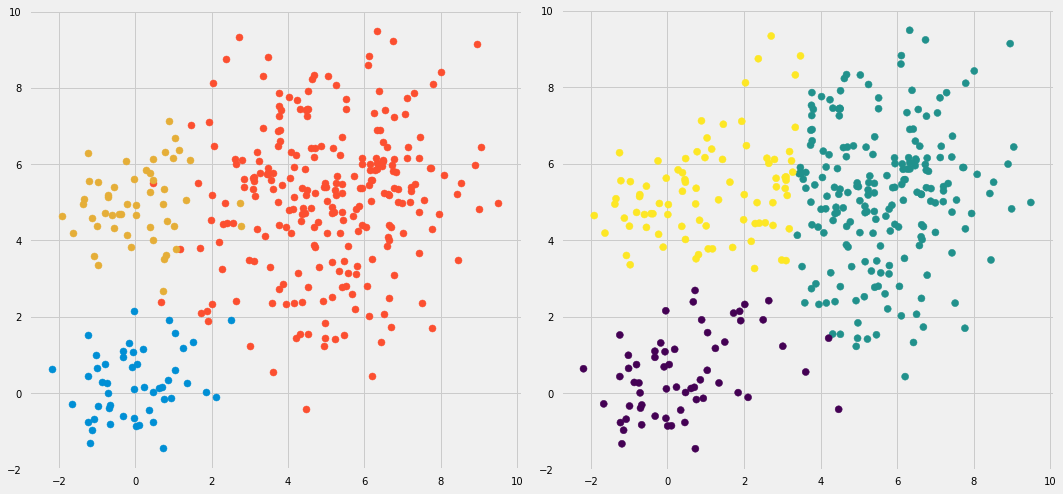

In [146]:
# Create data from three different multivariate distributions
X_1 = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]], size=50)
X_2 = np.random.multivariate_normal(mean=[5, 5], cov=[[3, 0], [0, 3]], size=250)
X_3 = np.random.multivariate_normal(mean=[0, 5], cov=[[1, 0], [0, 1]], size=50)
df = np.concatenate([X_1, X_2, X_3])


km = KMeans(n_clusters=3)
km.fit(df)
labels = km.predict(df)
centroids = km.cluster_centers_

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[1].scatter(df[:, 0], df[:, 1], c=labels)
ax[1].set_aspect('equal')
ax[0].scatter(X_1[:, 0], X_1[:, 1])
ax[0].scatter(X_2[:, 0], X_2[:, 1])
ax[0].scatter(X_3[:, 0], X_3[:, 1])
ax[0].set_aspect('equal')
plt.tight_layout()

In [147]:
pd.value_counts(labels)

1    203
2     86
0     61
dtype: int64

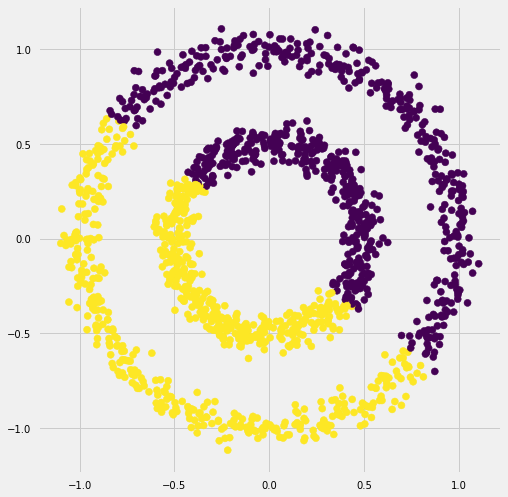

In [150]:
# Cricles
X = make_circles(factor=0.5, noise=0.05, n_samples=1500)

km = KMeans(n_clusters=2)
km.fit(X[0])
labels = km.predict(X[0])
centroids = km.cluster_centers_

fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(X[0][:, 0], X[0][:, 1], c=labels)
ax.set_aspect('equal')

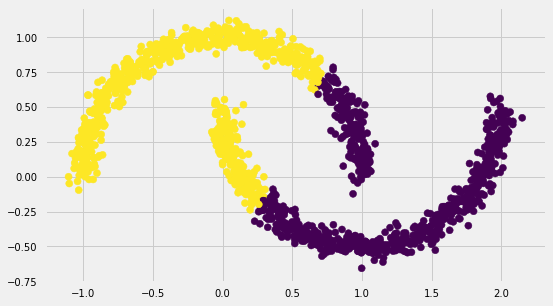

In [151]:
# Moons
X = make_moons(n_samples=1500, noise=0.05)

km = KMeans(n_clusters=2)
km.fit(X[0])
labels = km.predict(X[0])
centroids = km.cluster_centers_

fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(X[0][:, 0], X[0][:, 1], c=labels)
# plt.xlim([0, 6])
# plt.ylim([0, 6])
ax.set_aspect('equal')

<h2 style="font-family: Georgia; font-size:2em;color:purple; font-style:bold">
Conclusion
</h2><br>
Below are some takeaways:
* Scale the data when applying K-means algorithm
* Elbow method in selecting number of clusters doesn't usually work because the error function is monotonically decreasing for all $k$s
* If there is no example assigned to a cluster, we should eliminate it
* K-means gives more weight to the bigger cluster
* K-means assumes spherical shapes of clusters (with radius equal to the distance between the centroid and the furthest example) and doesn't work well when clusters are in different shapes such as elliptical clusters. Also, if there is overlapping between clusters, K-means doesn't have an intrinsic measure for uncertainty for the examples belong to the overlapping region in order to determine for which cluster to assign each example
* K-means may still cluster the data even if it can't be clustered such as data that comes from *uniform distributions*. See below: